# 기계학습기초 - 실습과제 2
# e비즈니스학과 201823871 박지헌

# assignment

### DT를 학습시켜 DT graph를 시각화하고 test set에 대한 정확도를 출력하시오
### 그리고 가장 중요한 feature를 2가지를 선택해서 다시 DT classifier를 학습시키시오.
### 이후  decision boundary를 시각화 하시오.


# import lib

In [1]:
import numpy as np
import os
import seaborn as sns
import pandas as pd
from graphviz import Source
from sklearn.tree import export_graphviz
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
import warnings
warnings.filterwarnings('ignore')

%matplotlib inline
import matplotlib.pyplot as plt

PROJECT_ROOT_DIR = "."
CHAPTER_ID = "decision_trees"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID)
os.makedirs(IMAGES_PATH, exist_ok=True)

np.random.seed(42)

# Setting

In [8]:
from sklearn.datasets import load_wine
wine = load_wine(as_frame=True)
df = wine.data
df['label'] = wine.target
df

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,label
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95.0,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740.0,2
174,13.40,3.91,2.48,23.0,102.0,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750.0,2
175,13.27,4.28,2.26,20.0,120.0,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835.0,2
176,13.17,2.59,2.37,20.0,120.0,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840.0,2


In [4]:
# wine = load_wine()
X_train, X_test, y_train, y_test = train_test_split(df.iloc[:,:13], df.label, test_size= 0.2, random_state = 11)

#### Optimize max_depth
최적의 max_depth를 찾기 위하여 1:11 까지 반복문을 사용하여 테스트셋의 정확도를 출력하였다.

In [4]:
for i in range(1,11):
    clf = DecisionTreeClassifier(max_depth= i,random_state=42)
    clf.fit(X_train,y_train)
    pred_test = clf.predict(X_test)
    print(f"Max_depth: {i} 정확도: {accuracy_score(pred_test, y_test)}")

Max_depth: 1 정확도: 0.6944444444444444
Max_depth: 2 정확도: 0.8888888888888888
Max_depth: 3 정확도: 0.9722222222222222
Max_depth: 4 정확도: 0.9444444444444444
Max_depth: 5 정확도: 0.9444444444444444
Max_depth: 6 정확도: 0.9444444444444444
Max_depth: 7 정확도: 0.9444444444444444
Max_depth: 8 정확도: 0.9444444444444444
Max_depth: 9 정확도: 0.9444444444444444
Max_depth: 10 정확도: 0.9444444444444444


* **max_depth = 3**에서 가장 높은 정확도를 보이고, 그 후에는 정확도가 오히려 떨어진다.

In [6]:
MAX_DEPTH = 3 #상수로 고정

# graph(tree) Viz

In [9]:
wine.target_names

array(['class_0', 'class_1', 'class_2'], dtype='<U7')

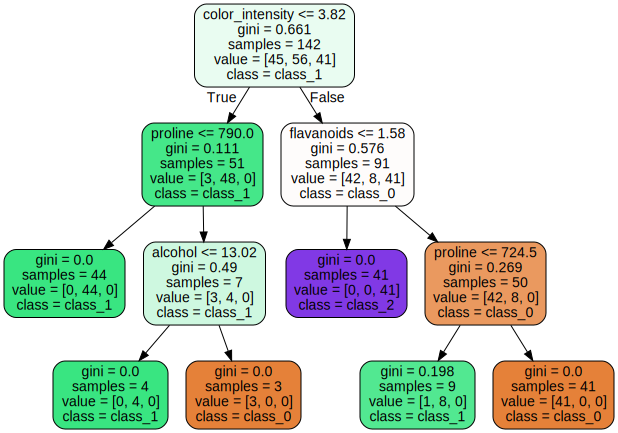

In [6]:
clf = DecisionTreeClassifier(max_depth=MAX_DEPTH,random_state=42)
X_train, X_test, y_train, y_test = train_test_split(df.iloc[:,:13], df.label, test_size= 0.2, random_state = 11)
clf.fit(X_train,y_train)

export_graphviz(
        clf,
        out_file=os.path.join(IMAGES_PATH, "wine_tree.dot"),
        feature_names=wine.feature_names,
        class_names=wine.target_names,
        rounded=True,
        filled=True
    )
Source.from_file(os.path.join(IMAGES_PATH, "wine_tree.dot"))

# Accuracy

In [7]:
pred_train = clf.predict(X_train)
pred_test = clf.predict(X_test)

print(f"train acc: {accuracy_score(pred_train, y_train)}")
print(f"test acc: {accuracy_score(pred_test, y_test)}")

train acc: 0.9929577464788732
test acc: 0.9722222222222222


#### Check Overfitting: Repeated Random Subsampling Validation Method
Dataset Split에서 seed값 변화에 따른 테스트셋의 정확도를 출력하였다.

In [7]:
for seed in range(10):
    X_train, X_test, y_train, y_test = train_test_split(df.iloc[:,:13], df.label, test_size= 0.2, random_state = seed)    
    clf = DecisionTreeClassifier(max_depth= MAX_DEPTH,random_state=42)
    clf.fit(X_train,y_train)
    pred_test = clf.predict(X_test)
    print(f"Seed: {seed} 정확도: {accuracy_score(pred_test, y_test)}")

Seed: 0 정확도: 0.9722222222222222
Seed: 1 정확도: 0.8611111111111112
Seed: 2 정확도: 0.9444444444444444
Seed: 3 정확도: 0.8333333333333334
Seed: 4 정확도: 0.8888888888888888
Seed: 5 정확도: 0.8055555555555556
Seed: 6 정확도: 0.8888888888888888
Seed: 7 정확도: 0.9166666666666666
Seed: 8 정확도: 0.9166666666666666
Seed: 9 정확도: 0.9722222222222222


* 데이터셋 분할에 따른 테스트셋 정확도에 편차가 크다.
* **Overfitting**이 의심된다.

# select most important 2 features
#### visualize feature importance

In [11]:
X

DecisionTreeClassifier(max_depth=3, random_state=42)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12]),
 [Text(0, 0, 'alcohol'),
  Text(1, 0, 'malic_acid'),
  Text(2, 0, 'ash'),
  Text(3, 0, 'alcalinity_of_ash'),
  Text(4, 0, 'magnesium'),
  Text(5, 0, 'total_phenols'),
  Text(6, 0, 'flavanoids'),
  Text(7, 0, 'nonflavanoid_phenols'),
  Text(8, 0, 'proanthocyanins'),
  Text(9, 0, 'color_intensity'),
  Text(10, 0, 'hue'),
  Text(11, 0, 'od280/od315_of_diluted_wines'),
  Text(12, 0, 'proline')])

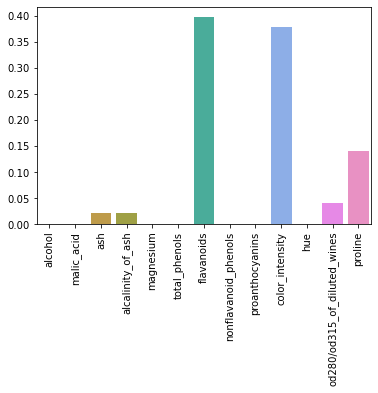

In [10]:
sns.barplot(x = clf.feature_names_in_, y = clf.feature_importances_)
plt.xticks(rotation = 90)

#### Sorting

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12]),
 [Text(0, 0, 'flavanoids'),
  Text(1, 0, 'color_intensity'),
  Text(2, 0, 'proline'),
  Text(3, 0, 'od280/od315_of_diluted_wines'),
  Text(4, 0, 'ash'),
  Text(5, 0, 'alcalinity_of_ash'),
  Text(6, 0, 'alcohol'),
  Text(7, 0, 'malic_acid'),
  Text(8, 0, 'magnesium'),
  Text(9, 0, 'total_phenols'),
  Text(10, 0, 'nonflavanoid_phenols'),
  Text(11, 0, 'proanthocyanins'),
  Text(12, 0, 'hue')])

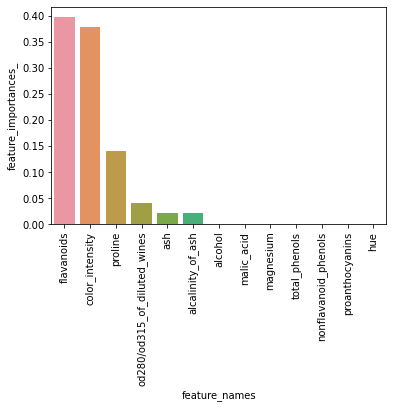

In [10]:
imp_df = pd.DataFrame({
    "feature_importances_": clf.feature_importances_,
    "feature_names": wine.feature_names
})

sns.barplot(x='feature_names', 
            y="feature_importances_", 
            data=imp_df, 
            order=imp_df.sort_values('feature_importances_',ascending=False).feature_names)
plt.xticks(rotation = 90)

#### Visualization data

<AxesSubplot:xlabel='flavanoids', ylabel='color_intensity'>

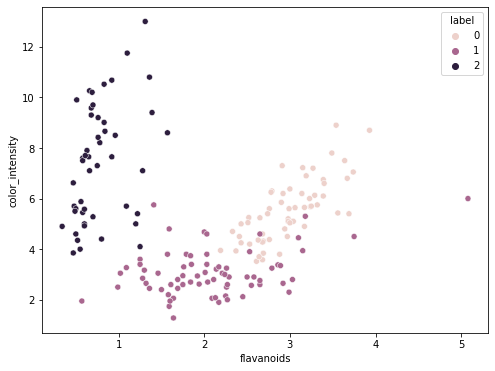

In [11]:
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='flavanoids', y="color_intensity", hue= "label")

# Train DT by only 2 features

In [12]:
X = df[['flavanoids', 'color_intensity']]
y = df['label']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.2, random_state = 11)

clf_2features = DecisionTreeClassifier(max_depth=MAX_DEPTH,random_state=42)
clf_2features.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=3, random_state=42)

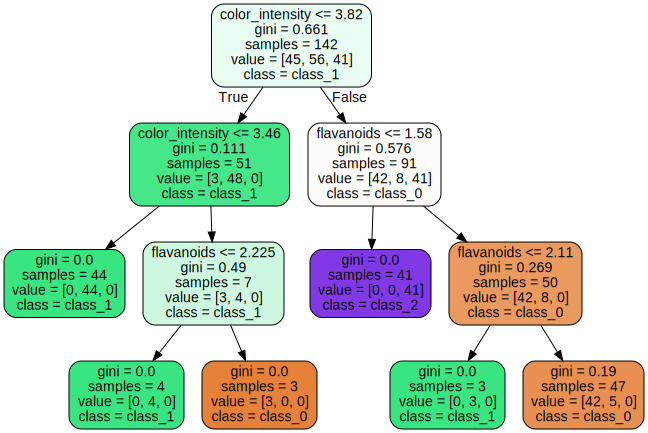

In [16]:
export_graphviz(
        clf_2features,
        out_file=os.path.join(IMAGES_PATH, "wine_tree2.dot"),
        feature_names=['flavanoids', 'color_intensity'],
        class_names=wine.target_names,
        rounded=True,
        filled=True
    )
Source.from_file(os.path.join(IMAGES_PATH, "wine_tree2.dot"))

# Accuracy (2 features DT)

In [13]:
pred_train = clf_2features.predict(X_train)
pred_test = clf_2features.predict(X_test)

print(f"train acc: {accuracy_score(pred_train, y_train)}")
print(f"test acc: {accuracy_score(pred_test, y_test)}")

train acc: 0.9647887323943662
test acc: 0.9166666666666666


#### Check Overfitting: Repeated Random Subsampling Validation Method
Dataset Split에서 seed값 변화에 따른 테스트셋의 정확도를 출력하였다.

In [14]:
for seed in range(10):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.2, random_state = seed)    
    clf = DecisionTreeClassifier(max_depth= MAX_DEPTH,random_state=42)
    clf.fit(X_train,y_train)
    pred_test = clf_2features.predict(X_test)
    print(f"Seed: {seed} 정확도: {accuracy_score(pred_test, y_test)}")

Seed: 0 정확도: 0.8333333333333334
Seed: 1 정확도: 0.9722222222222222
Seed: 2 정확도: 0.9722222222222222
Seed: 3 정확도: 0.9722222222222222
Seed: 4 정확도: 0.9722222222222222
Seed: 5 정확도: 0.9444444444444444
Seed: 6 정확도: 0.9444444444444444
Seed: 7 정확도: 0.9444444444444444
Seed: 8 정확도: 0.9444444444444444
Seed: 9 정확도: 1.0


* 데이터셋 분할에 따른 테스트셋 정확도에 편차가 확연히 줄었다.

# Decision Boundary

<AxesSubplot:xlabel='flavanoids', ylabel='color_intensity'>

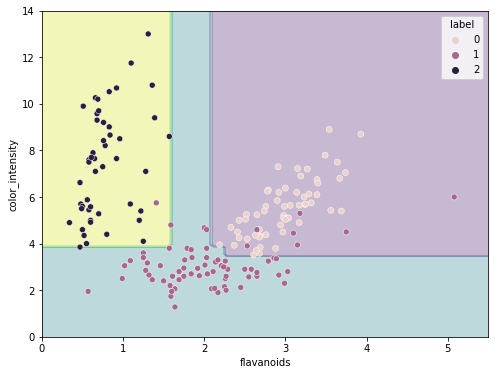

In [15]:
plt.figure(figsize=(8, 6))
axes=[0, 5.5, 0, 14]
x1s = np.linspace(axes[0], axes[1], 100)
x2s = np.linspace(axes[2], axes[3], 100)
x1, x2 = np.meshgrid(x1s, x2s)
X_new = np.c_[x1.ravel(), x2.ravel()]
y_pred = clf_2features.predict(X_new).reshape(x1.shape)
plt.contourf(x1, x2, y_pred, alpha=0.3)
sns.scatterplot(data=df, x='flavanoids', y="color_intensity", hue= "label")